Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('heart_cleveland_upload.csv')


Data Overview

In [3]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [4]:
dataset.info()
print()
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB



,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


EDA

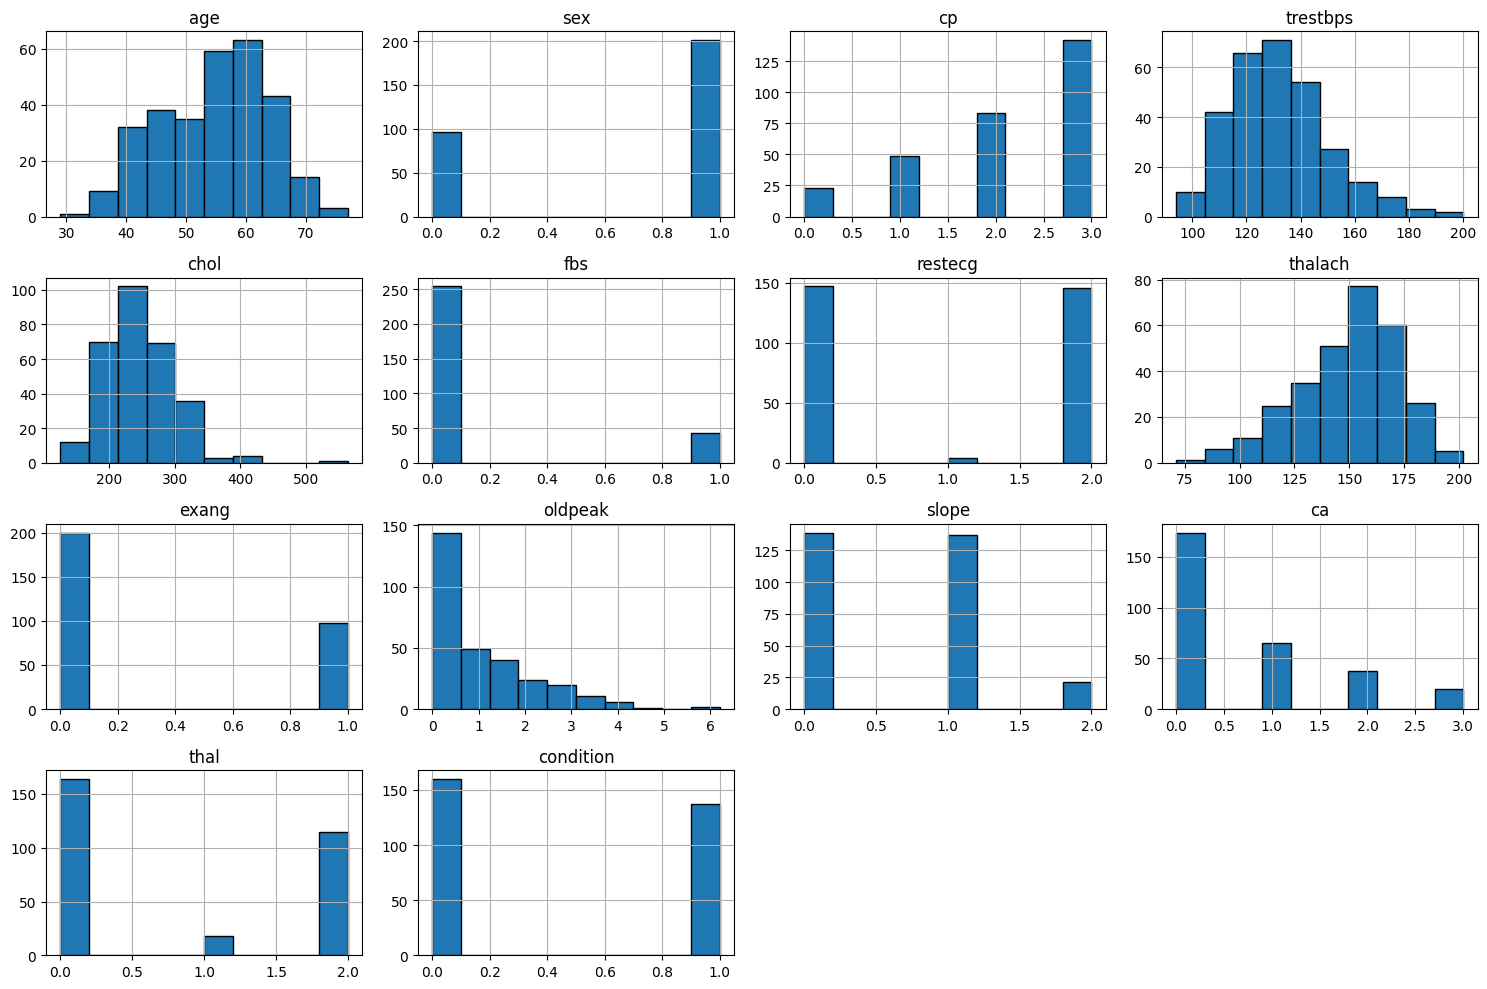

In [5]:
dataset.hist(figsize=(15,10),edgecolor='black')
plt.tight_layout()
plt.show()

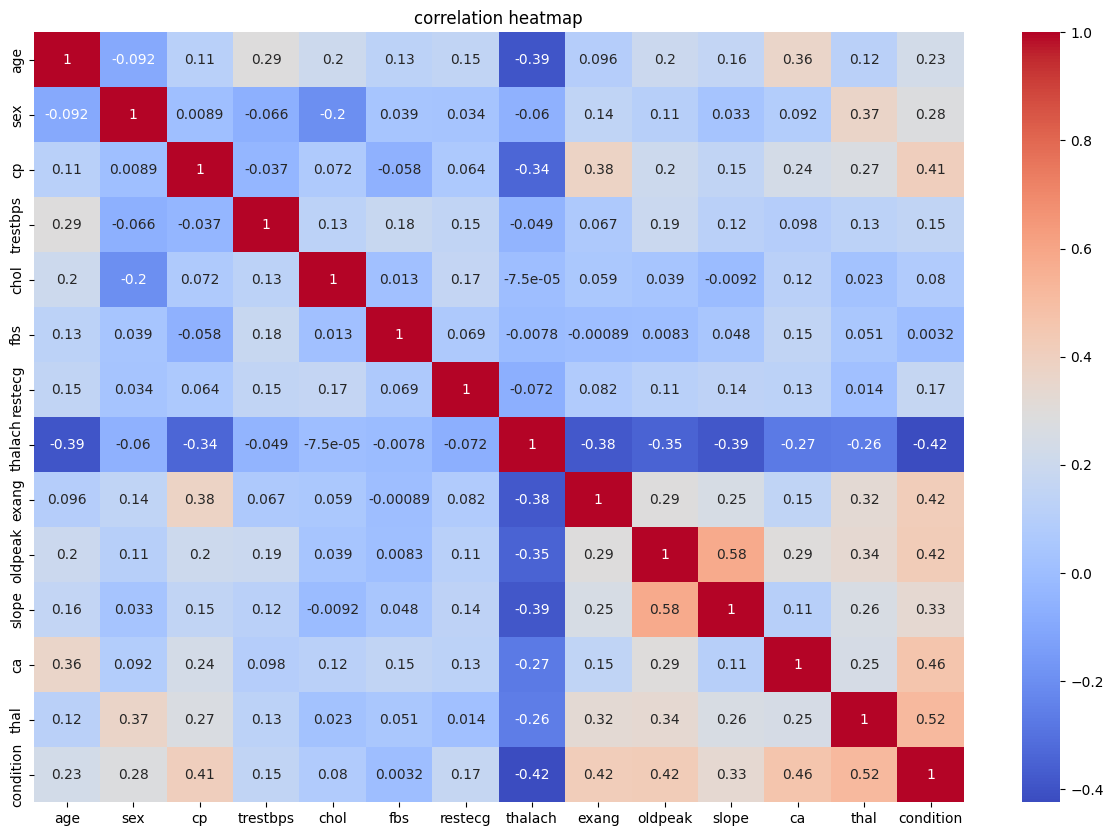

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm') #creates a heatmap
plt.title('correlation heatmap')
plt.show()

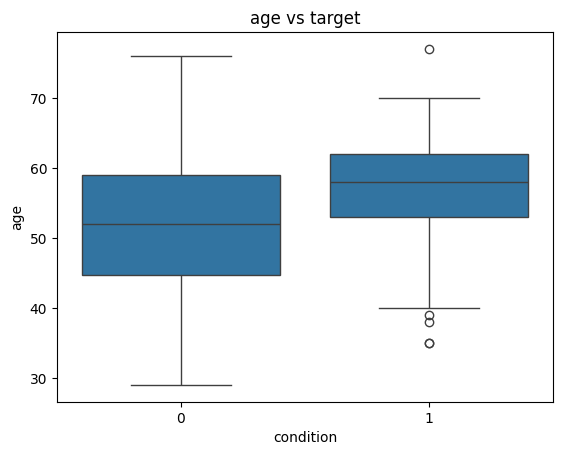

In [7]:
sns.boxplot(x ='condition', y ='age', data=dataset) #individual boxplot
plt.title('age vs target')
plt.show()

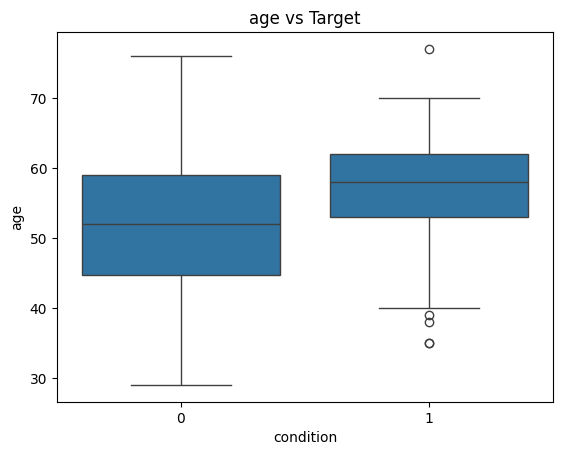

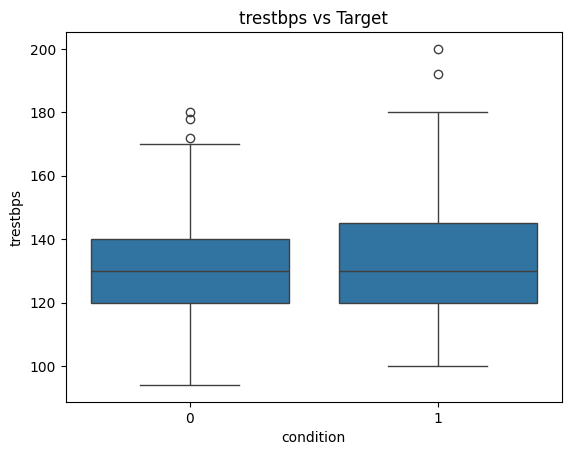

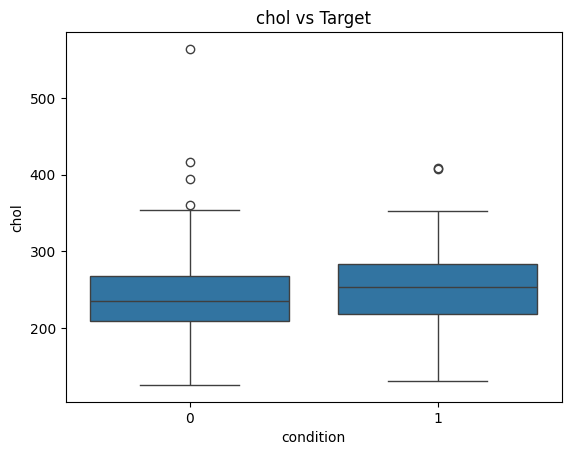

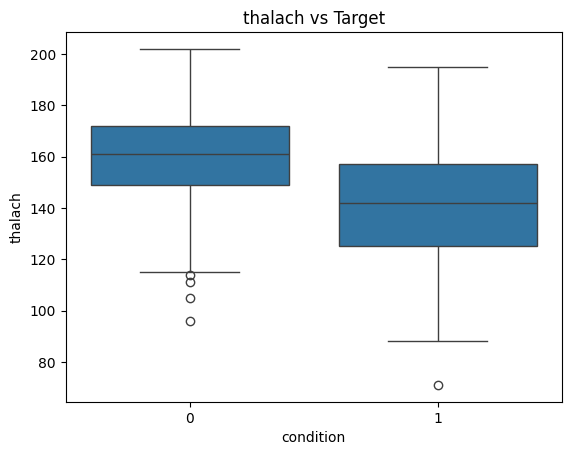

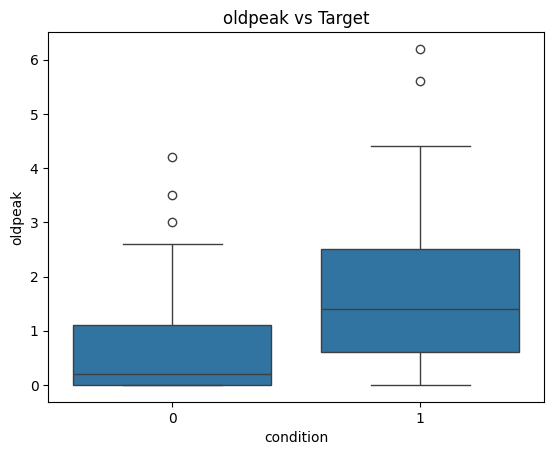

In [8]:
# For numerical features multiple
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for feature in num_features:
    sns.boxplot(x='condition', y=feature, data=dataset)
    plt.title(f'{feature} vs Target')
    plt.show()


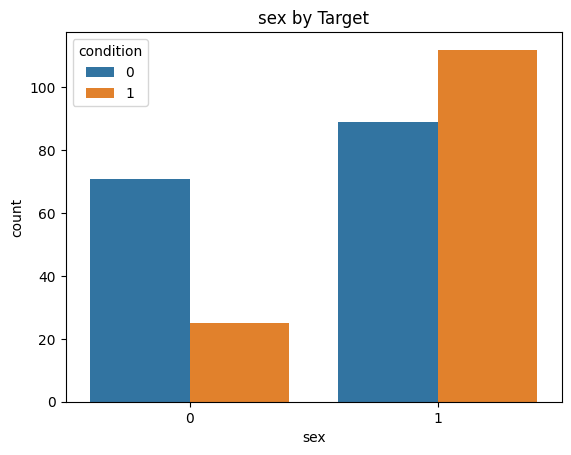

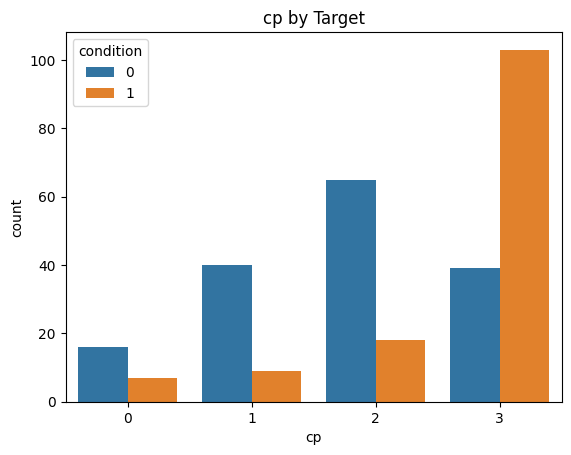

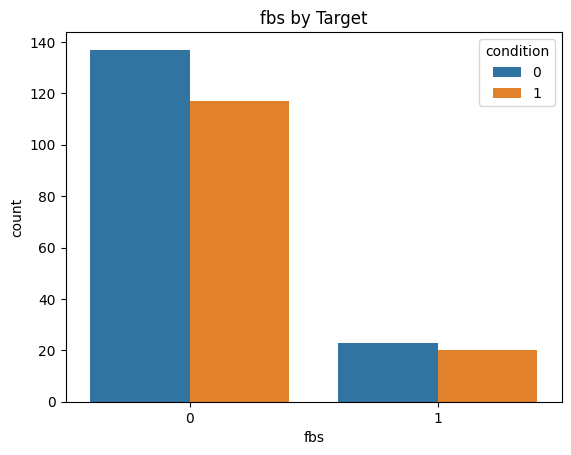

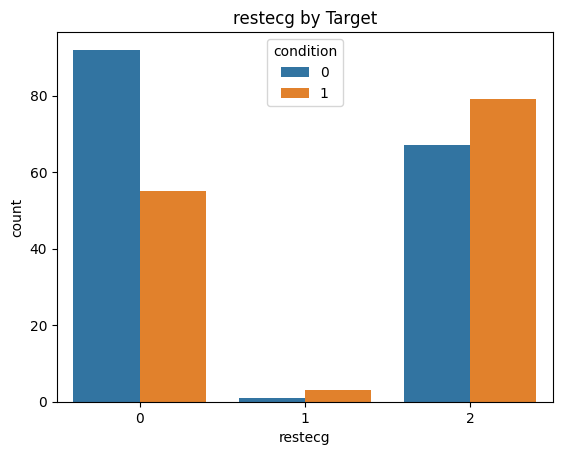

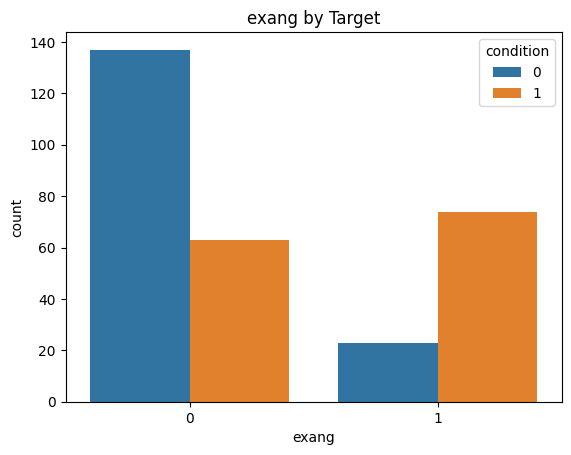

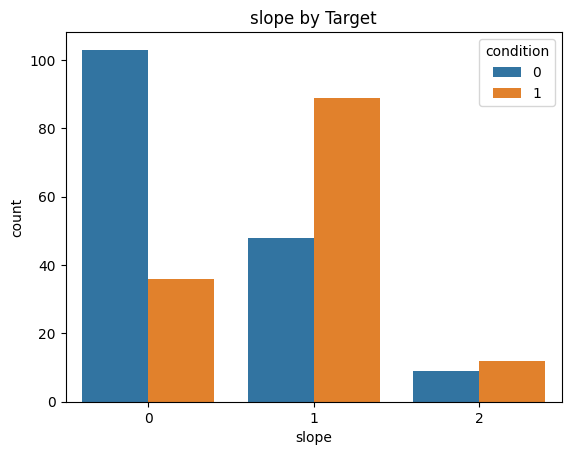

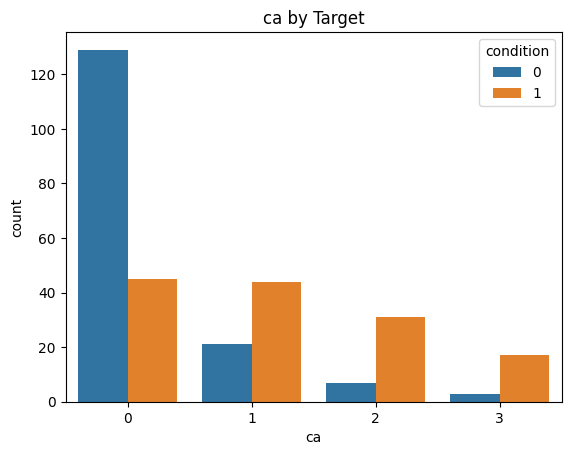

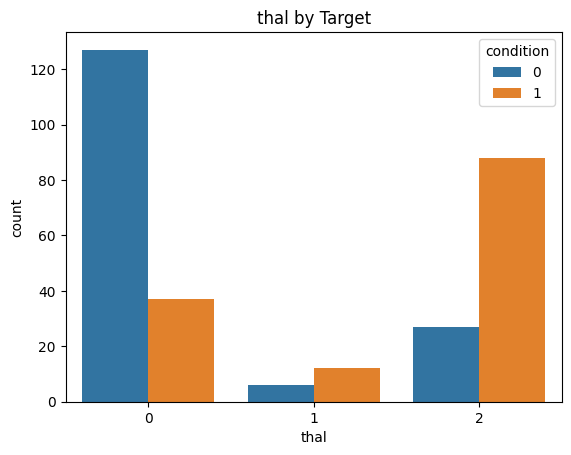

In [9]:
# For categorical features for multiple
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for feature in cat_features:
    sns.countplot(x=feature, hue='condition', data=dataset)
    plt.title(f'{feature} by Target')
    plt.show()


feature engineering

In [10]:
df = pd.get_dummies(dataset, columns = ['cp','thal','slope'],drop_first=True)

In [11]:
print(df)

     age  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  \
0     69    1       160   234    1        2      131      0      0.1   1   
1     69    0       140   239    0        0      151      0      1.8   2   
2     66    0       150   226    0        0      114      0      2.6   0   
3     65    1       138   282    1        2      174      0      1.4   1   
4     64    1       110   211    0        2      144      1      1.8   0   
..   ...  ...       ...   ...  ...      ...      ...    ...      ...  ..   
292   40    1       152   223    0        0      181      0      0.0   0   
293   39    1       118   219    0        0      140      0      1.2   0   
294   35    1       120   198    0        0      130      1      1.6   0   
295   35    0       138   183    0        0      182      0      1.4   0   
296   35    1       126   282    0        2      156      1      0.0   0   

     condition   cp_1   cp_2   cp_3  thal_1  thal_2  slope_1  slope_2  
0            0 

In [12]:
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = df.drop('condition', axis=1)
y = df['condition']

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) #split into 80-20


Model Training

In [14]:
from sklearn.linear_model import LogisticRegression
#logisitic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression()

In [15]:

from sklearn.tree import DecisionTreeClassifier
#decision tree classifier model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
#random forest classifier model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
from sklearn.svm import SVC
#svm model
svm = SVC()
svm.fit(X_train, y_train)


SVC()

Model Evaluation

===== Logistic Regression =====
Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.79      0.82      0.81        28

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



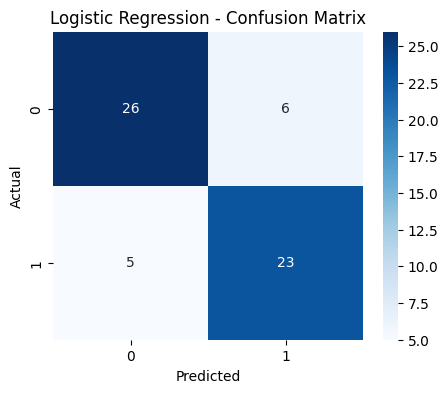

===== Decision Tree =====
Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70        32
           1       0.66      0.75      0.70        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.71      0.70      0.70        60



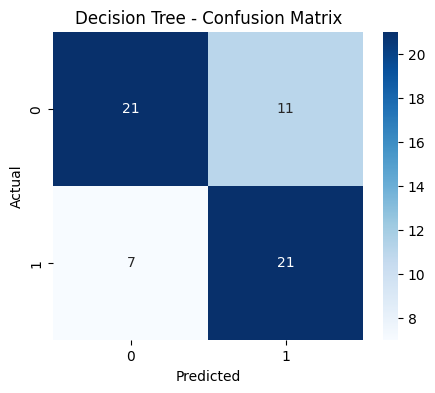

===== Random Forest =====
Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        32
           1       0.72      0.75      0.74        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



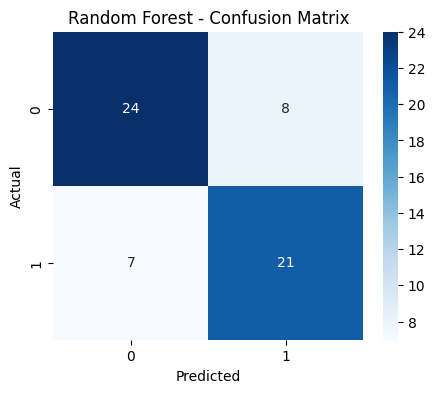

===== SVM =====
Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        32
           1       0.66      0.82      0.73        28

    accuracy                           0.72        60
   macro avg       0.73      0.72      0.72        60
weighted avg       0.73      0.72      0.72        60



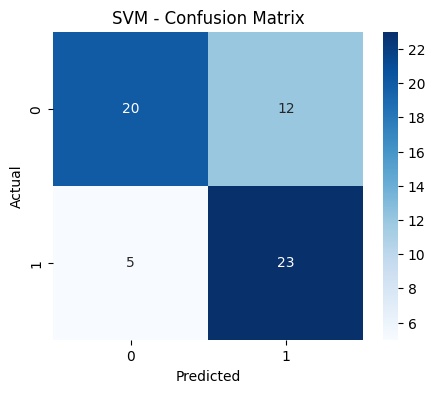

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

models = {
    'Logistic Regression': logreg,
    'Decision Tree': dtree,
    'Random Forest': rf,
    'SVM': svm
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred) #calculates accuracy for each model
    report = classification_report(y_test, y_pred, output_dict=True) # #calculates report which has precision, recall, f1
    cm = confusion_matrix(y_test, y_pred)

    print(f"===== {name} =====") #pretty code
    print(f"Accuracy: {acc:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Save results for comparison table
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score']
    })


In [19]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1-Score', ascending=False) # sorting descending order by f1 score
results_df.reset_index(drop=True, inplace=True)

print("\n Model Comparison:")
display(results_df)



 Model Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.816667,0.793103,0.821429,0.807018
1,Random Forest,0.750000,0.724138,0.750000,0.736842
2,SVM,0.716667,0.657143,0.821429,0.730159
3,Decision Tree,0.700000,0.656250,0.750000,0.700000


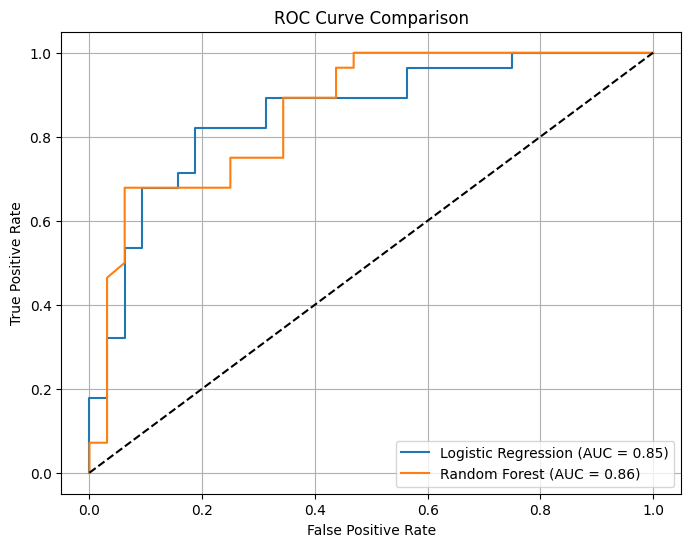

In [20]:
plt.figure(figsize=(8, 6))

for name, model in [('Logistic Regression', logreg), ('Random Forest', rf)]:
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1] #logistic regression has predict_proba
    else:
        y_probs = model.decision_function(X_test) #random forest doesnt not have it so we use decision_function

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Diagonal line for random guess cause well why not
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


In [22]:
import os
os.makedirs('plots', exist_ok=True)

In [23]:
plt.savefig('plots/roc_curve.png')

<Figure size 640x480 with 0 Axes>

Explainability

In [24]:
pip install shap


In [25]:
import shap
explainer = shap.Explainer(logreg.predict, X_test) #creates an object
shap_values = explainer(X_test)

PermutationExplainer explainer: 61it [00:10,  3.89it/s]                        


/tmp/ipython-input-28-718760874.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


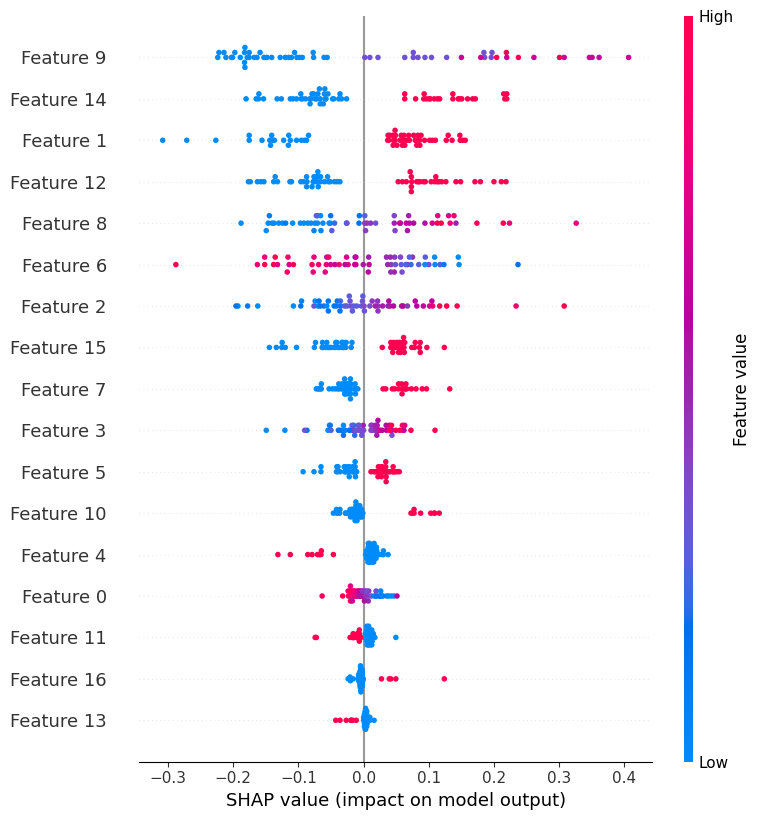

<Figure size 640x480 with 0 Axes>

In [28]:
shap.summary_plot(shap_values, X_test)
#gives a list top features which affect are at top
#blue - small values, red - big values
#points on right - have more effect
plt.savefig("plots/shap_summary.png")

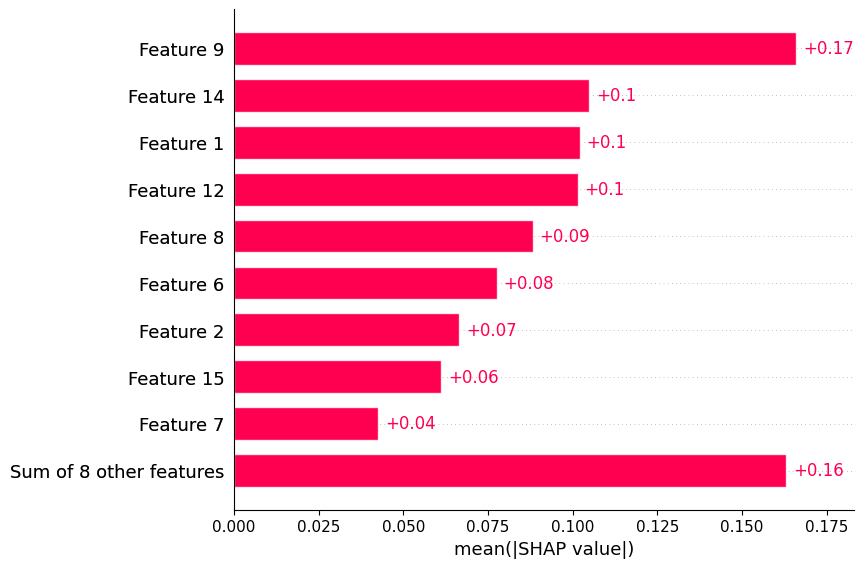

In [27]:
shap.plots.bar(shap_values)
